In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

In [105]:
df = pd.read_csv("cleaned_data.csv")

In [109]:
df.head(100)

,Job Title,Job Description,Rating,Company Name,Type of ownership,Industry,Sector,Competitors,max_salary,avg_salary,avg_size,city,state,age,python_yn,R_yn,spark_yn,aws_yn,hadoop_yn
0,"VP, Data Science","We are looking for a VP, Data Science to lead ...",3.9,7Park Data,Company - Private,Research & Development,Business Services,-1,250,212.5,125.5,New York,NY,8,1,0,1,0,0
1,Data Science Analyst,"Founded in 1923, the American College of Radio...",3.7,American College of Radiology,Nonprofit Organization,Health Fundraising Organizations,Non-Profit,-1,250,212.5,350.5,Reston,VA,97,0,0,0,0,0
2,"Director, Data Science","Reporting to the Sr. Director, Analytics & Dat...",3.6,Grainger,Company - Public,Wholesale,Business Services,-1,250,212.5,10000.0,Lake Forest,IL,93,1,0,0,0,0
3,"Data Science Manager, Connect",Build out rigorous observability and optimizat...,4.0,Stripe,Company - Private,Internet,Information Technology,"Braintree, Authorize.Net, PayPal",250,212.5,3000.5,San Francisco,CA,10,1,0,0,0,0
4,Product Data Scientist - Ads Data Science,Who We Are\n\n\nThe team is responsible for pl...,4.0,Twitter,Company - Public,Internet,Information Technology,"Facebook, Google, Pinterest",250,212.5,3000.5,San Francisco,CA,14,1,0,0,0,0
5,Data Science Software Engineer,We love programming and the excitement that co...,4.8,Klaviyo,Company - Private,Computer Hardware & Software,Information Technology,-1,250,212.5,350.5,Boston,MA,8,1,0,0,0,0
6,Data Science Associate,"As a Data Science Associate, you'll analyze la...",3.7,Via Transportation,Company - Private,Internet,Information Technology,-1,250,212.5,750.5,New York,NY,8,1,0,0,0,0
7,Data Science Internship,Are you good at uncovering hidden information?...,3.8,Avanceon Limited,Company - Private,Architectural & Engineering Services,Business Services,-1,250,212.5,125.5,Exton,PA,-1,0,0,0,1,0
8,Data Science Intern,"Fullpower® designs, develops and operates a co...",4.5,"Fullpower Technologies, Inc.",-1,-1,-1,-1,250,212.5,-1.0,Santa Cruz,CA,-1,1,0,0,0,0
9,Data Science Associate,Shareablee produces extensive Data Science pro...,2.1,Shareablee,Company - Private,Enterprise Software & Network Solutions,Information Technology,-1,250,212.5,25.5,New York,NY,8,1,0,1,0,1


In [96]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name',
       'Type of ownership', 'Industry', 'Sector', 'Competitors', 'max_salary',
       'avg_salary', 'avg_size', 'city', 'state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'hadoop_yn'],
      dtype='object')

In [97]:
def title_simplifier(title):
    t = title.lower()
    if 'data scientist' in t:
        return 'data scientist'
    elif 'data engineer' in t:
        return 'data engineer'
    elif 'analyst' in t:
        return 'analyst'
    elif 'machine learning' in t:
        return 'mle'
    elif 'manager' in t:
        return 'manager'
    elif 'director' in t:
        return 'director'
    else: 
        return 'NA'

In [200]:
def seniority(title):
    t = title.lower()
    if 'head' in t or 'special' in t or 'consult' in t or 'sr' in t or 'director' in t or 'senior' in t or 'lead' in t or 'principal' in t or 'VP' in t or 'manager' in t:
        return 'senior'
    elif 'jr' in t or 'junior' in t:
        return 'jr'
    elif 'intern' in t:
        return 'intern'
    else:
        return 'other'

In [201]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [202]:
df.job_simp.value_counts()

NA                568
manager           183
director          145
analyst            80
data scientist      9
mle                 9
data engineer       5
Name: job_simp, dtype: int64

In [203]:
df['seniority'] = df['Job Title'].apply(seniority)

In [204]:
df.seniority.value_counts()

senior    555
other     416
intern     26
jr          2
Name: seniority, dtype: int64

In [205]:
#Job description length
df['desc_len'] = df['Job Description'].apply(len)

In [206]:
#competitors num
df['num_comp']=df.Competitors.apply(lambda x: len(x.split(",")) if x != '-1' else 0)

In [207]:
df.num_comp.value_counts()

0    772
3    183
2     33
1     11
Name: num_comp, dtype: int64

In [208]:
df.describe()

,Rating,max_salary,avg_salary,avg_size,age,python_yn,R_yn,spark_yn,aws_yn,hadoop_yn,desc_len,num_comp
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.333634,140.634635,111.658158,2946.074074,30.092092,0.505506,0.003003,0.189189,0.179179,0.144144,3393.717718,0.626627
std,1.639691,49.926696,41.291021,3966.057065,45.227985,0.500220,0.054745,0.391855,0.383694,0.351412,2095.678208,1.183441
min,-1.000000,58.000000,47.500000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000
25%,3.400000,106.000000,79.000000,125.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1667.500000,0.000000
50%,3.800000,125.000000,100.000000,350.500000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3155.000000,0.000000
75%,4.200000,173.000000,130.000000,7500.500000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4449.000000,0.000000
max,5.000000,257.000000,212.500000,10000.000000,327.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18355.000000,3.000000


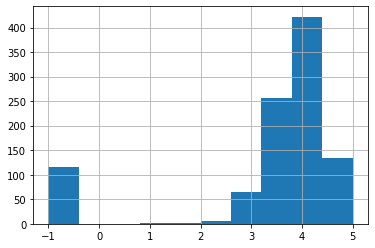

In [209]:
df.Rating.hist()

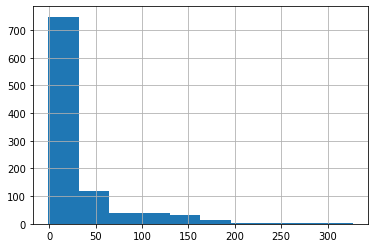

In [210]:
df.age.hist()

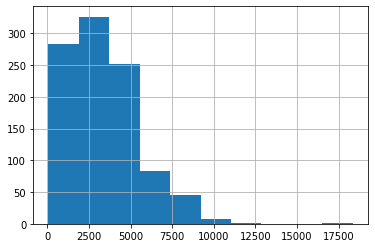

In [211]:
df.desc_len.hist()

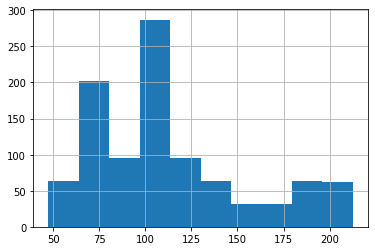

In [212]:
df.avg_salary.hist()

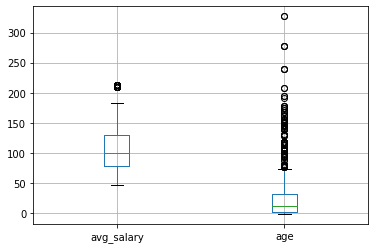

In [213]:
df.boxplot(column = ['avg_salary','age'])

In [214]:
df[['avg_salary','Rating','age','desc_len']].corr()

,avg_salary,Rating,age,desc_len
avg_salary,1.000000,0.041215,0.016921,-0.029117
Rating,0.041215,1.000000,0.194778,-0.012401
age,0.016921,0.194778,1.000000,0.289635
desc_len,-0.029117,-0.012401,0.289635,1.000000


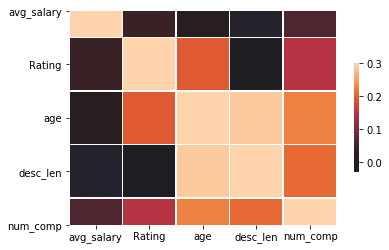

In [215]:
sns.heatmap(df[['avg_salary','Rating','age','desc_len','num_comp']].corr(),vmax=0.3,center=0,
           square=True,linewidth=0.5,cbar_kws={'shrink':0.5})

In [216]:
#Categorical

In [217]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name',
       'Type of ownership', 'Industry', 'Sector', 'Competitors', 'max_salary',
       'avg_salary', 'avg_size', 'city', 'state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'hadoop_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [218]:
df_cat = df[['Job Title','avg_size','Type of ownership','Industry','Sector','Company Name','state','city','python_yn','R_yn','spark_yn','aws_yn','hadoop_yn','job_simp','seniority','num_comp']]

graph for Job Title: total = 472


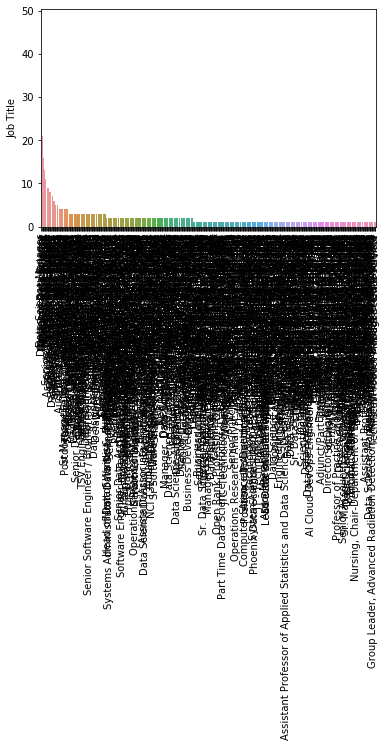

graph for avg_size: total = 8


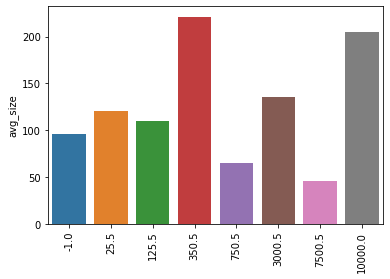

graph for Type of ownership: total = 12


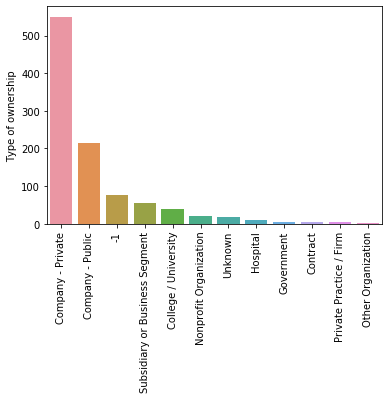

graph for Industry: total = 59


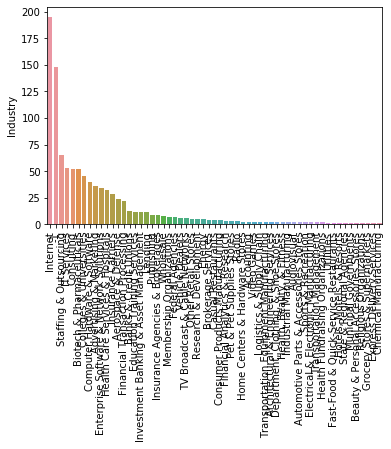

graph for Sector: total = 21


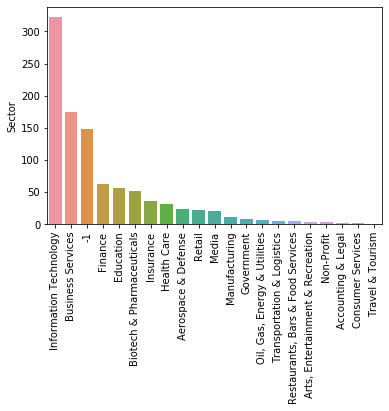

graph for Company Name: total = 427


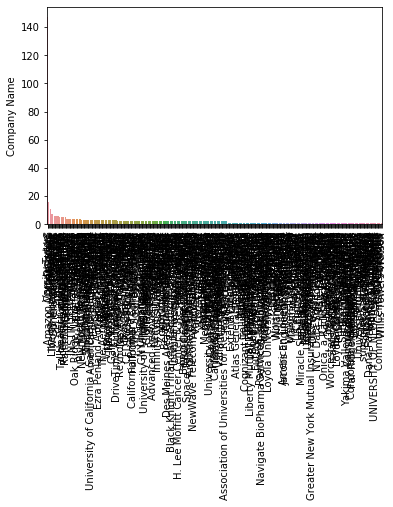

graph for state: total = 41


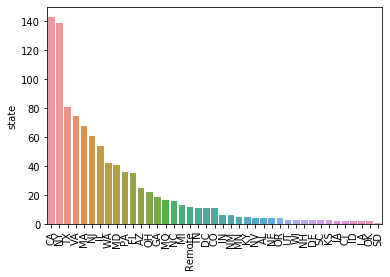

graph for city: total = 250


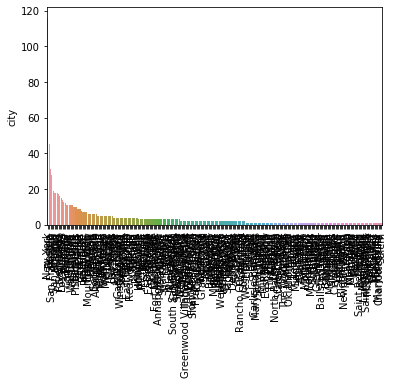

graph for python_yn: total = 2


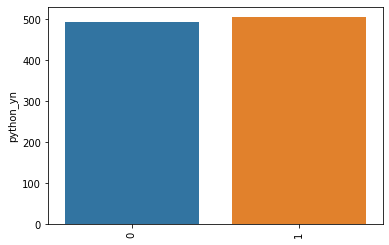

graph for R_yn: total = 2


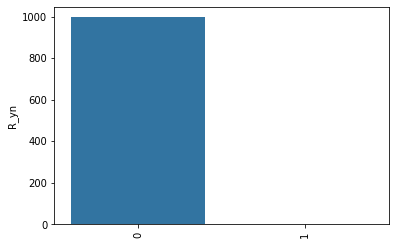

graph for spark_yn: total = 2


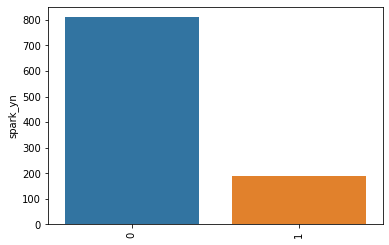

graph for aws_yn: total = 2


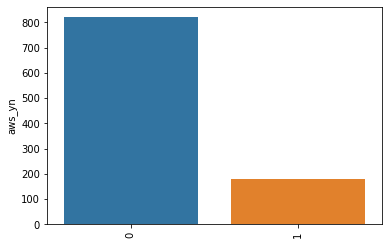

graph for hadoop_yn: total = 2


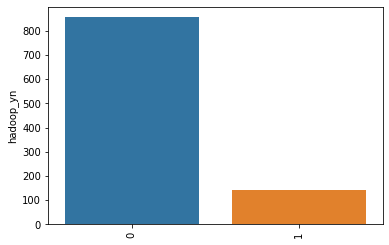

graph for job_simp: total = 7


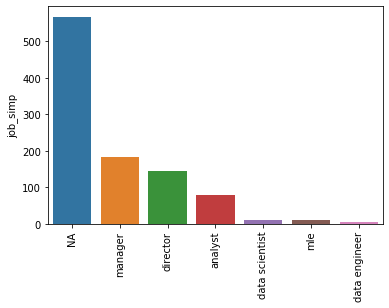

graph for seniority: total = 4


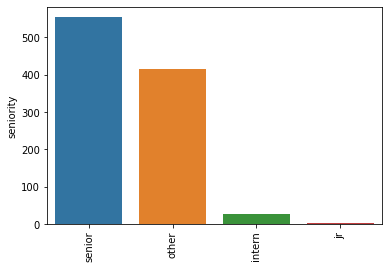

graph for num_comp: total = 4


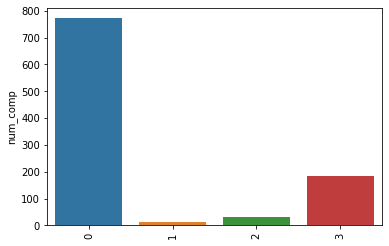

In [219]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' %(i,len(cat_num)))
    ax = sns.barplot(x=cat_num.index,y=cat_num)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

graph for city: total = 20


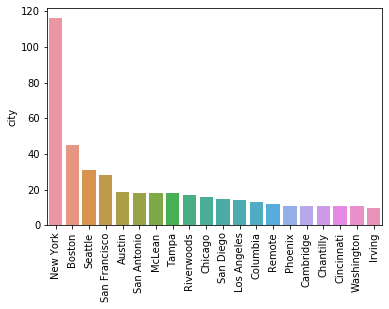

graph for state: total = 20


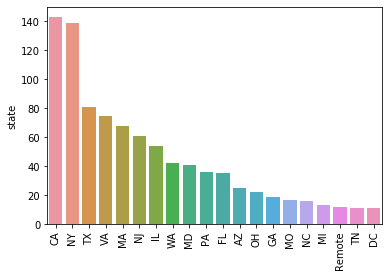

graph for Company Name: total = 20


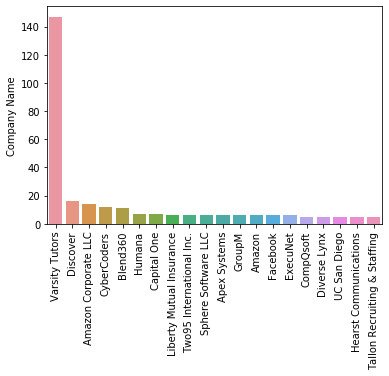

graph for Industry: total = 20


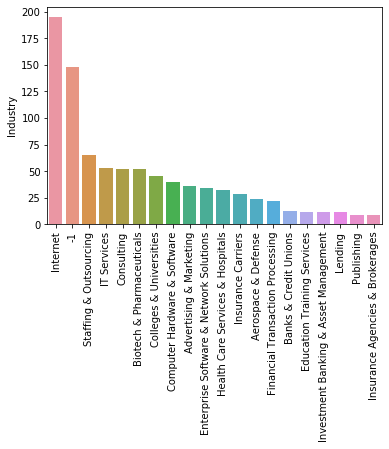

graph for Sector: total = 20


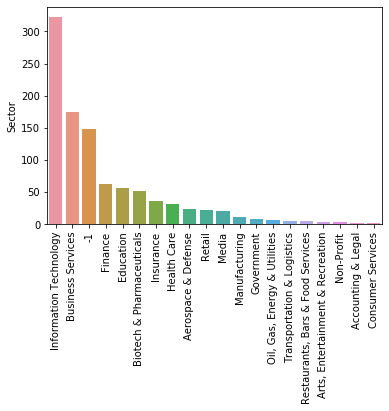

In [262]:
for i in df_cat[['city','state','Company Name','Industry','Sector']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' %(i,len(cat_num)))
    ax = sns.barplot(x=cat_num.index,y=cat_num)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()

In [ ]:
# NY city most popular
# CA state most popular
# Not so many Remote jobs - Surpising
# Varsity Tutors, Discover
# A lot of Staffing and Outsourcers out there!!
#Retail - not so many jobs!

In [221]:
import numpy as np

In [222]:
pd.pivot_table(df,index='job_simp',values=('avg_salary'))

,avg_salary
job_simp,
NA,111.952465
analyst,117.950000
data engineer,129.800000
data scientist,131.333333
director,107.372414
manager,110.631148
mle,97.333333


In [ ]:
#Managers,directors and mles are earning less than data engineers and data analysts 

In [223]:
pd.pivot_table(df,index=['job_simp','seniority'],values=('avg_salary'),aggfunc=(np.mean,len))

len        mean
job_simp       seniority                   
NA             intern      25.0  172.320000
               jr           2.0  161.000000
               other      365.0  111.709589
               senior     176.0  103.323864
analyst        other       44.0  127.113636
               senior      36.0  106.750000
data engineer  intern       1.0  212.500000
               other        2.0   89.000000
               senior       2.0  129.250000
data scientist other        4.0  146.500000
               senior       5.0  119.200000
director       senior     145.0  107.372414
manager        senior     183.0  110.631148
mle            other        1.0   95.000000
               senior       8.0   97.625000

In [ ]:
##Interns making waaaay more than regular post??

In [236]:
df[df.job_simp=="NA"][df.seniority=='intern']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Job Title,Job Description,Rating,Company Name,Type of ownership,Industry,Sector,Competitors,max_salary,avg_salary,...,age,python_yn,R_yn,spark_yn,aws_yn,hadoop_yn,job_simp,seniority,desc_len,num_comp
7,Data Science Internship,Are you good at uncovering hidden information?...,3.8,Avanceon Limited,Company - Private,Architectural & Engineering Services,Business Services,-1,250,212.5,...,-1,0,0,0,1,0,NA,intern,2009,0
8,Data Science Intern,"Fullpower® designs, develops and operates a co...",4.5,"Fullpower Technologies, Inc.",-1,-1,-1,-1,250,212.5,...,-1,1,0,0,0,0,NA,intern,1704,0
14,Data Science & Analytics Intern,Job Summary\n\n\nWe are looking for a Data Sci...,4.1,Cuker,Company - Private,Advertising & Marketing,Business Services,-1,250,212.5,...,14,0,0,0,0,0,NA,intern,1960,0
16,Spring Data Science Intern,"Job Description:\n\nØptimus Consulting, a data...",4.5,Øptimus,Company - Private,-1,-1,-1,250,212.5,...,-1,1,0,0,0,0,NA,intern,2854,0
20,Healthcare Data Science Intern,IQVIA is the leading human data science compan...,3.6,IQVIA,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,"PPD, INC Research, PRA Health Sciences",250,212.5,...,3,1,0,0,0,0,NA,intern,2721,3
22,Data Science Intern,Responsibilities\n\nWork on high-visibility pr...,4.7,SiO Digital,Company - Private,Advertising & Marketing,Business Services,"SmartBug Media, Kobe Digital (US), Firesnap",250,212.5,...,5,1,0,0,0,0,NA,intern,976,3
23,Data Science Internship,If you love to problem solve and think outside...,3.9,CATCH Intelligence,Company - Private,-1,-1,-1,250,212.5,...,-1,0,0,0,0,0,NA,intern,876,0
24,Data Science Intern (USA Remote),What is Pathrise?\nPathrise (YC W18) is an onl...,4.9,Pathrise,Company - Private,Education Training Services,Education,-1,250,212.5,...,3,0,0,0,1,0,NA,intern,3150,0
26,Data Science Intern,Data Science InternTitle Data Science Intern T...,4.7,Prospect 33,Company - Private,Consulting,Business Services,"Capco, Accenture, PwC",250,212.5,...,15,0,0,0,0,0,NA,intern,1734,3
27,Data Science Internship,About Us:\n\nMather Economics is a business co...,4.0,Mather Economics,Company - Private,-1,-1,-1,250,212.5,...,-1,1,0,1,0,1,NA,intern,2752,0


In [263]:
# Seems like the companies just put the salary expectations arbitrarily for interns. This is questionable for other fields as well! Bad job guys!!

In [264]:
pd.pivot_table(df,
               index='state',
               values = 'avg_salary',aggfunc=(np.mean,len))\
               .sort_values('mean',ascending=False)

,len,mean
state,,
NE,4.0,179.750000
KY,5.0,137.300000
NH,3.0,136.000000
WI,3.0,135.333333
AZ,25.0,133.060000
IA,2.0,132.000000
Remote,12.0,126.625000
AL,4.0,125.625000
LA,2.0,125.250000


In [266]:
#AZ > MO >CA > NY - Surprising!

In [269]:
pd.pivot_table(df,index=['state','job_simp'],values = 'avg_salary',aggfunc=(np.mean,'count')).sort_values('state',ascending=False)

count        mean
state  job_simp                         
WI     NA                  3  135.333333
WA     manager            20  107.125000
       director            3   91.000000
       NA                 19  102.210526
VA     manager             8  127.125000
       director            2  120.500000
       analyst            11  133.545455
       NA                 54  101.796296
UT     manager             3   99.333333
TX     director           16  100.312500
       NA                 48   99.531250
       analyst             8  100.625000
       manager             7  141.928571
       mle                 2  109.000000
TN     manager             1  112.500000
       NA                 10  117.250000
SD     NA                  1   68.500000
SC     NA                  3   81.166667
Remote director            4   91.625000
       NA                  8  144.125000
PA     manager             8   96.312500
       director            8  110.125000
       analyst             2  105.500000
       NA                 18   99.944444
OR     NA                  4   79.250000
OK     manager             1   95.000000
       NA                  1   47.500000
OH     analyst             6  121.333333
       NA                 15  102.066667
       mle                 1  112.500000
NY     manager            30  103.983333
       director           32  108.484375
       data scientist      3  118.666667
       analyst             9  123.777778
       NA                 65  118.907692
NV     NA                  4   94.750000
NM     NA                  3   95.000000
       manager             1  119.500000
       director            2   94.000000
NJ     analyst             6  119.166667
       NA                 41  109.048780
       manager             6  102.250000
       director            8  109.500000
NH     director            3  136.000000
NE     NA                  4  179.750000
NC     mle                 2   93.000000
       manager             5   81.800000
       analyst             1  105.500000
       NA                  8  107.687500
MO     NA                 15  127.566667
       director            1   59.000000
       analyst             1   47.500000
MN     director            3  101.833333
       mle                 1  100.000000
       NA                  1  209.000000
MI     analyst             1  179.500000
       NA                 12  105.583333
MD     manager             6  103.916667
       director            3   76.500000
       data scientist      1   79.000000
       data engineer       2   89.000000
       analyst            10   96.250000
       NA                 19  118.078947
MA     manager            21  105.428571
       director            8  104.000000
       analyst             5  116.500000
       NA                 34  110.294118
LA     manager             2  125.250000
KY     NA                  5  137.300000
KS     NA                  3   84.666667
IN     manager             2  155.500000
       NA                  4   93.000000
IL     manager             5  127.600000
       director           10  115.200000
       analyst             8  103.000000
       NA                 31  119.483871
ID     director            2  122.500000
IA     NA                  2  132.000000
GA     manager             4  110.250000
       analyst             3  108.000000
       NA                 12   95.875000
FL     analyst             4  145.125000
       NA                 17  101.735294
       manager            10  126.650000
       director            4  140.250000
DE     manager             3   99.333333
DC     manager             2   91.750000
       director            2  122.500000
       analyst             2  197.750000
       NA                  5  102.900000
CT     NA                  2  113.500000
CO     director            2  125.250000
       analyst             1   95.000000
       NA                  6  110.750000
       manager             2  131.750000
CA     mle                 2   82.250000
     

In [270]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name',
       'Type of ownership', 'Industry', 'Sector', 'Competitors', 'max_salary',
       'avg_salary', 'avg_size', 'city', 'state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'hadoop_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [ ]:
#salary x rating, industry, sector, revenue, num_comp, python, r, spark, aws, desc_len

In [280]:
df_pivots = df[['avg_salary','Rating', 'Industry', 'Sector', 'num_comp', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'desc_len']]

In [294]:
for i in df_pivots.iloc[:,1:].columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values = 'avg_salary',aggfunc=(np.mean,'count')).sort_values('mean',ascending=False))

Rating
        count        mean
Rating                   
 2.1        1  212.500000
 1.4        1  183.000000
 4.7        7  142.357143
 4.4       17  125.911765
 4.9        7  124.000000
 2.5        4  123.375000
 4.5       40  122.187500
 4.1       39  120.820513
 3.9       52  119.317308
 4.0       62  115.822581
 3.3       35  114.628571
 3.1       16  113.843750
 2.8        9  113.555556
 3.4       37  113.324324
 3.7       68  112.117647
 4.3       26  111.634615
 3.5       50  111.300000
 3.6       49  110.918367
 2.9        4  110.750000
 4.2      175  109.500000
 4.6       25  108.480000
-1.0      115  107.508696
 3.2       17  106.676471
 3.8       68  104.705882
 4.8       12  104.375000
 5.0       27  102.407407
 2.7        4  101.250000
 2.6        9  100.777778
 3.0       22   95.500000
 1.0        1   47.500000
Industry
                                         count        mean
Industry                                                  
Beauty & Personal Accessories Stor

In [298]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [299]:
words = " ".join(df['Job Description'].text.drop_duplicates())

AttributeError: 'Series' object has no attribute 'text'

In [304]:
words = ' '.join(df['Job Description'])

In [305]:
def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join(ele for ele in words_filtered)

In [313]:
wc = WordCloud(background_color='white',stopwords=STOPWORDS,max_words=1000,width=800,height=1500)
wc.generate(text)

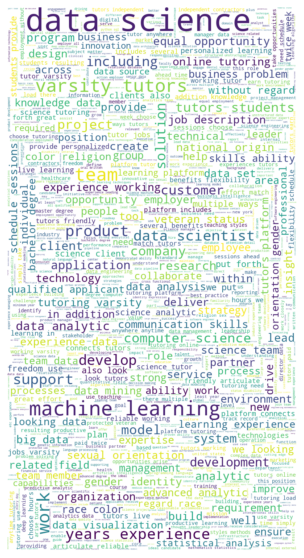

In [314]:
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()